#Importing modules

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization
import re
import nltk #for natural language processing
import string
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

#reading dataset

In [136]:
dataset=pd.read_csv("sentimentdataset.csv")

#data overviewing and exploration

In [137]:
dataset.head() #display first few rows

,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [138]:
dataset.sample(20) #display 20 random rows

,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
150,153,The euphoria of a successful product launch. ...,Euphoria,4/3/2022 11:45,ProductLaunchJoy,Facebook,#Euphoria #ProductLaunchSuccess,15,30,USA,2022,4,3,11
226,231,"Indifferent to the noise of the world, a sile...",Indifference,3/10/2023 16:30,SilentSpectator,Instagram,#Indifference #SilentObserver,9,18,India,2023,3,10,16
207,210,Floating through the day with an air of indif...,Indifference,3/22/2023 16:30,AloofObserver,Facebook,#Indifference #FloatingThroughLife,10,20,Canada,2023,3,22,16
347,352,Feeling empowered after conquering a challengi...,Empowerment,9/5/2018 14:20,HikingExplorer,Instagram,#Empowerment #HikingAdventure,35,70,USA,2018,9,5,14
417,422,Imbued with gratitude for the simple pleasure ...,Gratitude,2/15/2023 8:30,TeaEnthusiast,Twitter,#Gratitude #WarmTea,18,35,Japan,2023,2,15,8
457,462,"A soul weathered by the storm of heartbreak, s...",Heartbreak,4/18/2019 11:00,StormSeeker,Twitter,#Heartbreak #CalmAfterStorm,22,45,Brazil,2019,4,18,11
147,150,Feeling a sense of fulfillment after helping ...,Fulfillment,8/28/2011 18:45,HelperHeart,Facebook,#Fulfillment #HelpingOthers,22,45,Canada,2011,8,28,18
341,346,Curiosity sparked by exploring a mysterious an...,Curiosity,8/22/2016 15:10,HistoryExplorer,Facebook,#Curiosity #AncientDiscovery,18,35,Greece,2016,8,22,15
181,184,"Frustration boils over, a volcanic eruption o...",Frustration,4/10/2017 14:45,ExplosiveMind,Twitter,#Frustration #EmotionalOutburst,12,25,USA,2017,4,10,14
578,583,"As the waves crash against the shore, the surf...",Ocean's Freedom,7/20/2021 18:15,SurfingEnthusiastWaveRider,Facebook,#OceansFreedom #SurfingThrills,22,45,Brazil,2021,7,20,18


In [139]:
dataset.shape

(732, 14)

In [140]:
dataset.columns

Index(['ID', 'Text', 'Sentiment (Label)', 'Timestamp', 'User', 'Source',
       'Topic', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

checking datatypes of features

In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 732 non-null    int64 
 1   Text               732 non-null    object
 2   Sentiment (Label)  732 non-null    object
 3   Timestamp          732 non-null    object
 4   User               732 non-null    object
 5   Source             732 non-null    object
 6   Topic              732 non-null    object
 7   Retweets           732 non-null    int64 
 8   Likes              732 non-null    int64 
 9   Country            732 non-null    object
 10  Year               732 non-null    int64 
 11  Month              732 non-null    int64 
 12  Day                732 non-null    int64 
 13  Hour               732 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 80.2+ KB


##Data preprocessing

checking for nulls

In [142]:
dataset.isnull().sum()

ID                   0
Text                 0
Sentiment (Label)    0
Timestamp            0
User                 0
Source               0
Topic                0
Retweets             0
Likes                0
Country              0
Year                 0
Month                0
Day                  0
Hour                 0
dtype: int64

checking for duplicates in the dataset

In [143]:
dataset.duplicated().sum()

0

In [144]:
dataset['Sentiment (Label)'].value_counts()

Sentiment (Label)
 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: count, Length: 279, dtype: int64

###Converting into lowercase

In [145]:
columns_to_lowercase = ['Sentiment (Label)','Text']
for column in columns_to_lowercase:
    dataset[column] = dataset[column].str.lower()

In [146]:
dataset.sample(20)

,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
713,718,participating in a science fair to showcase a ...,neutral,10/11/2023 16:45,ScienceFairParticipationHighSchool,Facebook,#ScienceFair #HighSchoolScience,19,37,USA,2023,10,11,16
643,648,exploring the world of coding. debugging is an...,excitement,8/2/2023 14:45,CodeExplorerHighSchool,Twitter,#CodingAdventure #HighSchoolCoderLife,25,50,UK,2023,8,2,14
645,650,started a photography club at school. capturin...,joy,8/4/2023 16:30,PhotoClubHighSchool,Instagram,#PhotographyClub #HighSchoolPhotographer,22,45,USA,2023,8,4,16
418,423,marveling at the kaleidoscope of colors in a v...,marvel,8/22/2015 15:00,MarketExplorer,Instagram,#Marvel #ColorfulStreetMarket,22,45,Brazil,2015,8,22,15
457,462,"a soul weathered by the storm of heartbreak, s...",heartbreak,4/18/2019 11:00,StormSeeker,Twitter,#Heartbreak #CalmAfterStorm,22,45,Brazil,2019,4,18,11
664,669,hiding a snack stash in my backpack for emerge...,mischievous,8/23/2023 16:45,SnackNinjaHighSchool,Twitter,#SnackNinja #HighSchoolSnacks,28,55,USA,2023,8,23,16
81,84,laughter is the key to joy—attending a stand-...,joy,2/22/2023 19:30,StandUpFan,Facebook,#Joy #StandUpComedy,22,45,Canada,2023,2,22,19
249,254,"gazing towards the horizon with hopeful eyes,...",hopeful,4/18/2022 8:00,DreamPainter,Instagram,#Hopeful #CanvasOfDreams,12,24,India,2022,4,18,8
145,148,arousal of excitement before a much-awaited t...,arousal,3/10/2018 9:45,TravelExcitement,Twitter,#Arousal #TravelAdventure,20,40,India,2018,3,10,9
377,382,pensive contemplation amid the ancient ruins o...,pensive,4/18/2023 17:10,RuinsExplorer,Twitter,#Pensive #AncientCivilization,18,35,Greece,2023,4,18,17


###Operations on 'Topic' column to split it into two columns

Searching in "Topic" column if there exist a row with topics !=2 (if less or more)

In [147]:
# Count the number of rows where the hashtag count is not 2
non_2_count = dataset[dataset['Topic'].apply(lambda x: x.count('#')) != 2].shape[0]

# Print the count
print("Count of rows where the number of hashtags is not 2:", non_2_count)

Count of rows where the number of hashtags is not 2: 0


Then we can split it into two different columns called Topic 1 and Topic 2

In [148]:
# Split the "Topic" column into two separate columns
dataset[['Topic1', 'Topic2']] = dataset['Topic'].str.extract(r'\#(\w+)\s+\#(\w+)')
# The regular expression \#(\w+)\s+\#(\w+) matches two hashtags followed by words and extracts the words.

# Drop the original "Topic" column
dataset.drop(columns=['Topic'], inplace=True)


In [149]:
dataset.head()

,ID,Text,Sentiment (Label),Timestamp,User,Source,Retweets,Likes,Country,Year,Month,Day,Hour,Topic1,Topic2
0,0,enjoying a beautiful day at the park! ...,positive,1/15/2023 12:30,User123,Twitter,15,30,USA,2023,1,15,12,Nature,Park
1,1,traffic was terrible this morning. ...,negative,1/15/2023 8:45,CommuterX,Twitter,5,10,Canada,2023,1,15,8,Traffic,Morning
2,2,just finished an amazing workout! 💪 ...,positive,1/15/2023 15:45,FitnessFan,Instagram,20,40,USA,2023,1,15,15,Fitness,Workout
3,3,excited about the upcoming weekend getaway! ...,positive,1/15/2023 18:20,AdventureX,Facebook,8,15,UK,2023,1,15,18,Travel,Adventure
4,4,trying out a new recipe for dinner tonight. ...,neutral,1/15/2023 19:55,ChefCook,Instagram,12,25,Australia,2023,1,15,19,Cooking,Food


removing all unnecessary columns from the dataset

In [150]:
columns_to_drop = ['Timestamp', 'User','Retweets','Likes','Country','Year','Month','Day','Hour','Source','Topic1','Topic2']
dataset.drop(columns=columns_to_drop, inplace=True)


In [151]:
dataset.head()

,ID,Text,Sentiment (Label)
0,0,enjoying a beautiful day at the park! ...,positive
1,1,traffic was terrible this morning. ...,negative
2,2,just finished an amazing workout! 💪 ...,positive
3,3,excited about the upcoming weekend getaway! ...,positive
4,4,trying out a new recipe for dinner tonight. ...,neutral


###Removing punctuation

In [152]:
def remove_punctuation(text):
    # Define a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    # Apply the translation table to remove punctuation
    return text.translate(translator)

# Apply the function to the specific column
dataset['Text'] = dataset['Text'].apply(remove_punctuation)

In [153]:
dataset.head()

,ID,Text,Sentiment (Label)
0,0,enjoying a beautiful day at the park ...,positive
1,1,traffic was terrible this morning ...,negative
2,2,just finished an amazing workout 💪 ...,positive
3,3,excited about the upcoming weekend getaway ...,positive
4,4,trying out a new recipe for dinner tonight ...,neutral


###Removing emojis

In [154]:
def remove_emojis(Text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', Text)

# Apply the function to the specific column
dataset['Text'] = dataset['Text'].apply(remove_emojis)

In [155]:
dataset.head()

,ID,Text,Sentiment (Label)
0,0,enjoying a beautiful day at the park ...,positive
1,1,traffic was terrible this morning ...,negative
2,2,just finished an amazing workout,positive
3,3,excited about the upcoming weekend getaway ...,positive
4,4,trying out a new recipe for dinner tonight ...,neutral


###Removing Stop words using NLTK

In [156]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [157]:
nltk.download('stopwords') #stopwords removal
nltk.download('punkt') #tokenization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sch2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sch2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [158]:
column_name = 'Text'
def remove_stopwords(Text):
    # Tokenize the Text into words
    words = word_tokenize(Text)

    # Get the list of stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the Text
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_Text = ' '.join(filtered_words)

    return filtered_Text

In [159]:
dataset['Text'] = dataset['Text'].apply(remove_stopwords)

In [160]:
dataset.head()

,ID,Text,Sentiment (Label)
0,0,enjoying beautiful day park,positive
1,1,traffic terrible morning,negative
2,2,finished amazing workout,positive
3,3,excited upcoming weekend getaway,positive
4,4,trying new recipe dinner tonight,neutral


###Tokenization using NLTK

In [161]:
from nltk.tokenize import word_tokenize

In [162]:
dataset['Text'] = dataset['Text'].apply(lambda x: word_tokenize(str(x)))

In [163]:
dataset.head()

,ID,Text,Sentiment (Label)
0,0,"[enjoying, beautiful, day, park]",positive
1,1,"[traffic, terrible, morning]",negative
2,2,"[finished, amazing, workout]",positive
3,3,"[excited, upcoming, weekend, getaway]",positive
4,4,"[trying, new, recipe, dinner, tonight]",neutral


###lemmatization using NLTK

In [164]:
import nltk
from nltk.stem import WordNetLemmatizer

In [165]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sch2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [166]:
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a sentence
def lemmatize_sentence(sentence):
    xtext=str(sentence)
    words = nltk.word_tokenize(xtext)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the desired column
dataset['Text'] = dataset['Text'].apply(lambda x: lemmatize_sentence(x))


In [167]:
dataset.head(20)

,ID,Text,Sentiment (Label)
0,0,"[ 'enjoying ' , 'beautiful ' , 'day ' , 'park ' ]",positive
1,1,"[ 'traffic ' , 'terrible ' , 'morning ' ]",negative
2,2,"[ 'finished ' , 'amazing ' , 'workout ' ]",positive
3,3,"[ 'excited ' , 'upcoming ' , 'weekend ' , 'get...",positive
4,4,"[ 'trying ' , 'new ' , 'recipe ' , 'dinner ' ,...",neutral
5,5,"[ 'feeling ' , 'grateful ' , 'little ' , 'thin...",positive
6,6,"[ 'rainy ' , 'days ' , 'call ' , 'cozy ' , 'bl...",positive
7,7,"[ 'new ' , 'movie ' , 'release ' , 'mustwatch ' ]",positive
8,8,"[ 'political ' , 'discussions ' , 'heating ' ,...",negative
9,9,"[ 'missing ' , 'summer ' , 'vibes ' , 'beach '...",neutral


##Feature Engineering

###Word Embedding

####Using TF-IDF

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [169]:
# Assuming 'text_column' is the column containing text data
#text_column_data = dataset['Text'].tolist()

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data and transform it into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['Text'])

# Store the TF-IDF matrix in a new column in the DataFrame
dataset['Text'] = tfidf_matrix.toarray().tolist()


In [170]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 732 non-null    int64 
 1   Text               732 non-null    object
 2   Sentiment (Label)  732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [171]:
dataset.head(20)

,ID,Text,Sentiment (Label)
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",negative
2,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
3,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
4,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",neutral
5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
6,6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
7,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
8,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",negative
9,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",neutral


In [172]:
dataset['Sentiment (Label)'].unique()

array([' positive  ', ' negative  ', ' neutral   ', ' anger        ',
       ' fear         ', ' sadness      ', ' disgust      ',
       ' happiness    ', ' joy          ', ' love         ',
       ' amusement    ', ' enjoyment    ', ' admiration   ',
       ' affection    ', ' awe          ', ' disappointed ',
       ' surprise     ', ' acceptance   ', ' adoration    ',
       ' anticipation ', ' bitter       ', ' calmness     ',
       ' confusion    ', ' excitement   ', ' kind         ',
       ' pride        ', ' shame        ', ' confusion ', ' excitement ',
       ' shame ', ' elation       ', ' euphoria      ', ' contentment   ',
       ' serenity      ', ' gratitude     ', ' hope          ',
       ' empowerment   ', ' compassion    ', ' tenderness    ',
       ' arousal       ', ' enthusiasm    ', ' fulfillment  ',
       ' reverence     ', ' compassion', ' fulfillment   ', ' reverence ',
       ' elation   ', ' despair         ', ' grief           ',
       ' loneliness     

In [173]:
dataset['Text'].shape

(732,)

###converting any emotion into positive negative and neutral

####TextBlob Method

In [174]:
from textblob import TextBlob

# Assuming 'text_column' is the name of the column containing text data
sentiment_labels = []
for text in dataset['Sentiment (Label)']:
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        sentiment_labels.append("positive")
    elif analysis.sentiment.polarity < 0:
        sentiment_labels.append("negative")
    else:
        sentiment_labels.append("neutral")

dataset['Sentiment (Label)'] = sentiment_labels

###Pie chart for the percentage of sentiment

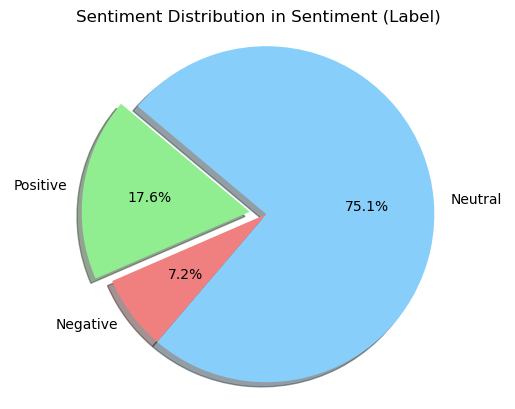

In [175]:
column_name = 'Sentiment (Label)'
column_values = dataset[column_name]

positive_count = (column_values == 'positive').sum()
negative_count = (column_values == 'negative').sum()
neutral_count = (column_values == 'neutral').sum()

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode the 1st slice (Positive)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Sentiment Distribution in {}'.format(column_name))

# Show the plot
plt.show()

In [176]:
x = dataset['Text'] # Features
y = dataset['Sentiment (Label)']  # Target variable

In [177]:
dataset.shape

(732, 3)

###upsampling

In [178]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd

# Assuming you have a DataFrame x containing your features and a Series y containing your labels

minority_classes = ['negative', 'positive']  # Replace with the specific class labels you want to upsample

# Filter the dataset to only include the minority classes
X_minority = x[y.isin(minority_classes)]
y_minority = y[y.isin(minority_classes)]

# Reshape the features if they are 1D
if len(X_minority.shape) == 1:
    X_minority = X_minority.values.reshape(-1, 1)

# Initialize the RandomOverSampler
ros = RandomOverSampler(sampling_strategy={'negative': 500, 'positive': 500}, random_state=42)


# Resample the minority classes
X_minority_resampled, y_minority_resampled = ros.fit_resample(X_minority, y_minority)

#creating another dataset called data
data = pd.DataFrame({})
# Combine the upsampled minority samples with the majority class samples
data['Text'] = pd.concat([x, pd.DataFrame(X_minority_resampled)], axis=0)
data['Sentiment'] = pd.concat([y, pd.Series(y_minority_resampled)], axis=0)


c:\Users\sch2\anaconda5\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (500) in class negative will be larger than the number of samples in the majority class (class #positive -> 129)
  warnings.warn(
c:\Users\sch2\anaconda5\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (500) in class positive will be larger than the number of samples in the majority class (class #positive -> 129)
  warnings.warn(


In [179]:
data.head(20)

,Text,Sentiment
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",negative
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",neutral
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",negative
9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",neutral


###pie chart for the upsampled data

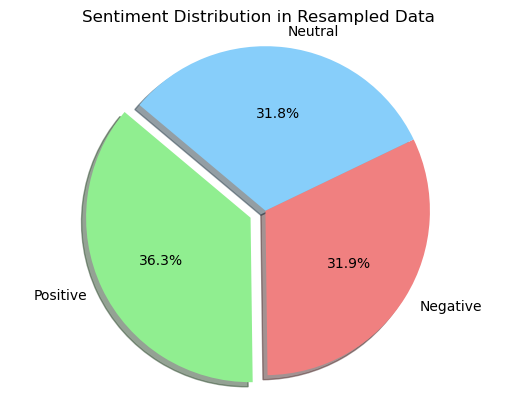

In [180]:
import matplotlib.pyplot as plt

# Assuming you have already upsampled your data and stored it in X_resampled and y_resampled

# Count the occurrences of each sentiment class in the resampled data
positive_count_resampled = (data['Sentiment'] == 'positive').sum()
negative_count_resampled = (data['Sentiment']  == 'negative').sum()
neutral_count_resampled = (data['Sentiment']  == 'neutral').sum()

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count_resampled, negative_count_resampled, neutral_count_resampled]
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode the 1st slice (Positive)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Sentiment Distribution in Resampled Data')

# Show the plot
plt.show()


In [181]:
data.head(20)

,Text,Sentiment
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",negative
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",neutral
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",negative
9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",neutral


encoding sentiment column

In [182]:
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

In [183]:
data.head(20)

,Text,Sentiment
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       1732 non-null   object
 1   Sentiment  1732 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 33.8+ KB


##Modeling and Evaluation

In [185]:
x=data['Text']
y=data['Sentiment']

In [186]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [187]:
print(x_train.shape,x_test.shape)

(1385,) (347,)


In [188]:
print(y_train.shape,y_test.shape)

(1385,) (347,)


In [189]:
# Assuming X_train and y_train are Pandas Series objects
x_train_array = np.array(x_train.tolist())  # Convert Series to NumPy array
x_train_flat = x_train_array.reshape(len(x_train_array), -1)  # Reshape the array

In [190]:
# Assuming X_test and y_test are also Pandas Series objects
x_test_array = np.array(x_test.tolist())  # Convert Series to NumPy array
x_test_flat = x_test_array.reshape(len(x_test_array), -1)  # Reshape the array

In [191]:
# Convert y_train and y_test to NumPy arrays if they're not already
y_train_array = np.array(y_train.tolist())
y_test_array = np.array(y_test.tolist())

In [192]:
x_train_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [193]:
x_test_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [194]:
y_test_array

array([1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2,
       1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2,
       2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1,
       2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1,
       2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2,
       0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 2,
       0, 1, 1, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0,
       0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2,

In [195]:
y_train_array

array([0, 2, 1, ..., 2, 2, 0])

###Logistic Regression

In [196]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(x_train_flat, y_train_array)
y_pred = model.predict(x_test_flat)
accuracy = accuracy_score(y_test_array, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9596541786743515


In [197]:
print(confusion_matrix(y_test_array, y_pred))

[[110   0   0]
 [  0 111  12]
 [  0   2 112]]


In [198]:
print(classification_report(y_test_array, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       0.98      0.90      0.94       123
           2       0.90      0.98      0.94       114

    accuracy                           0.96       347
   macro avg       0.96      0.96      0.96       347
weighted avg       0.96      0.96      0.96       347



In [199]:
import joblib

file = 'sentiment_model'
joblib.dump(model, file)

loaded_model = joblib.load(open(file, 'rb'))
pred_y = loaded_model.predict(x_test_flat)

result = np.round(accuracy_score(y_test_array, y_pred), 2)
print(result)



0.96


In [200]:
import pickle

file = 'sentiment_model.pkl'

pickle.dump(model, open(file, 'wb'))

loaded_model = pickle.load(open(file, 'rb'))
pred_y = loaded_model.predict(x_test_flat)

result = np.round(accuracy_score(y_test_array, y_pred), 2)
print(result)

0.96
